In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv(r"E:\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\Telco-Customer-Churn.csv")

In [131]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [132]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [134]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [135]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [136]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

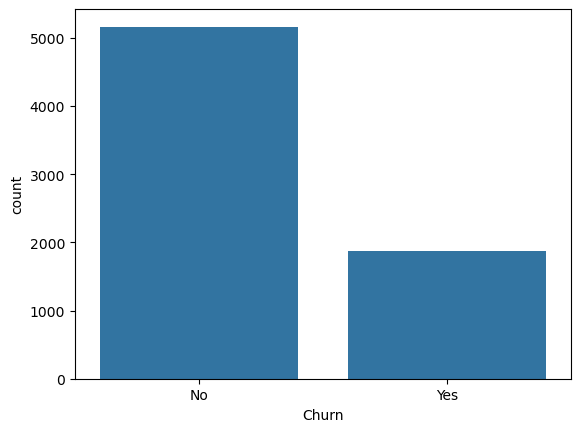

In [8]:
# Display the balance of Churn with Count Plot.
sns.countplot(data = df, x = 'Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

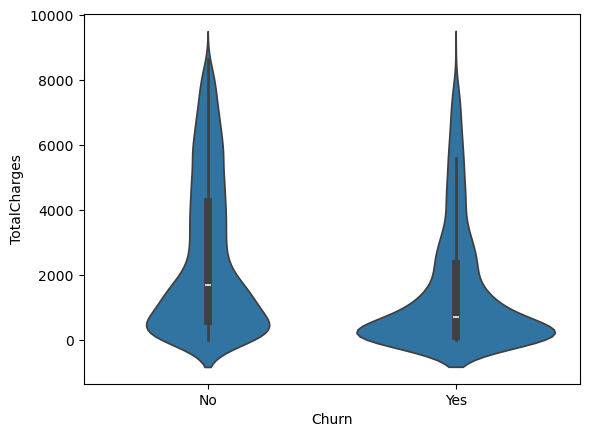

In [11]:
# Exploring the distribution of TotalCharges between churn categories with a violin plot.
sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

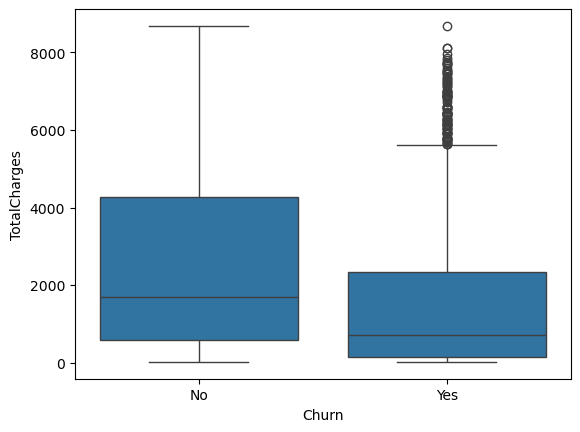

In [12]:
# Exploring the distribution of TotalCharges between churn categories with a Box Plot.
sns.boxplot(data = df, x = 'Churn', y = 'TotalCharges')

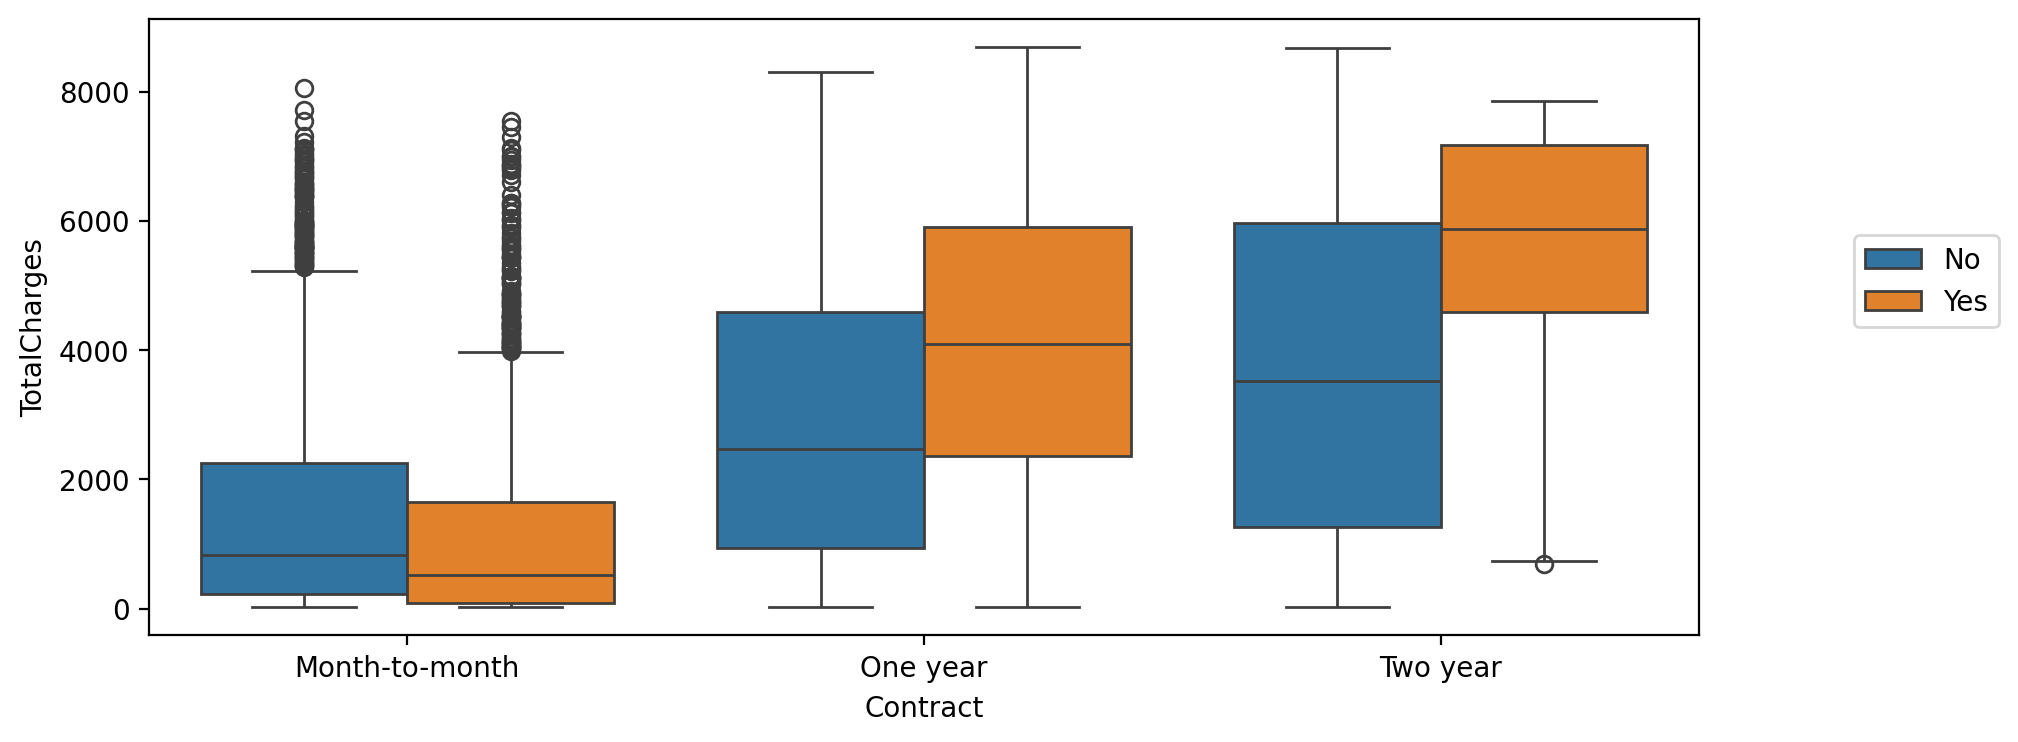

In [15]:
# Show the distribution of TotalCharges per ContractType using Box Plot.
plt.figure(figsize=(10,4), dpi = 200)
sns.boxplot(data = df, x = 'Contract', y = 'TotalCharges', hue = 'Churn')
plt.legend(loc = (1.1,0.5))

In [21]:
# Create bar plot showing corrrelation between vaious classes.
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [25]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [27]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [28]:
corr_yes_churn

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

C:\Users\mz128\AppData\Local\Temp\ipykernel_2104\3380902329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = corr_yes_churn.index, y = corr_yes_churn.values, palette="terrain_r")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Contract_Two year'),
  Text(1, 0, 'StreamingMovies_No internet service'),
  Text(2, 0, 'StreamingTV_No internet service'),
  Text(3, 0, 'TechSupport_No internet service'),
  Text(4, 0, 'DeviceProtection_No internet service'),
  Text(5, 0, 'OnlineBackup_No internet service'),
  Text(6, 0, 'OnlineSecurity_No internet service'),
  Text(7, 0, 'InternetService_No'),
  Text(8, 0, 'PaperlessBilling_No'),
  Text(9, 0, 'Contract_One year'),
  Text(10, 0, 'OnlineSecurity_Yes'),
  Text(11, 0, 'TechSupport_Yes'),
  Text(12, 0, 'Dependents_Yes'),
  Text(13, 0, 'Partner_Yes'),
  Text(14, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(15, 0, 'InternetService_DSL'),
  Text(16, 0, 'PaymentMethod_Bank transfer (automatic)'),
  Text(17, 0, 'Paymen

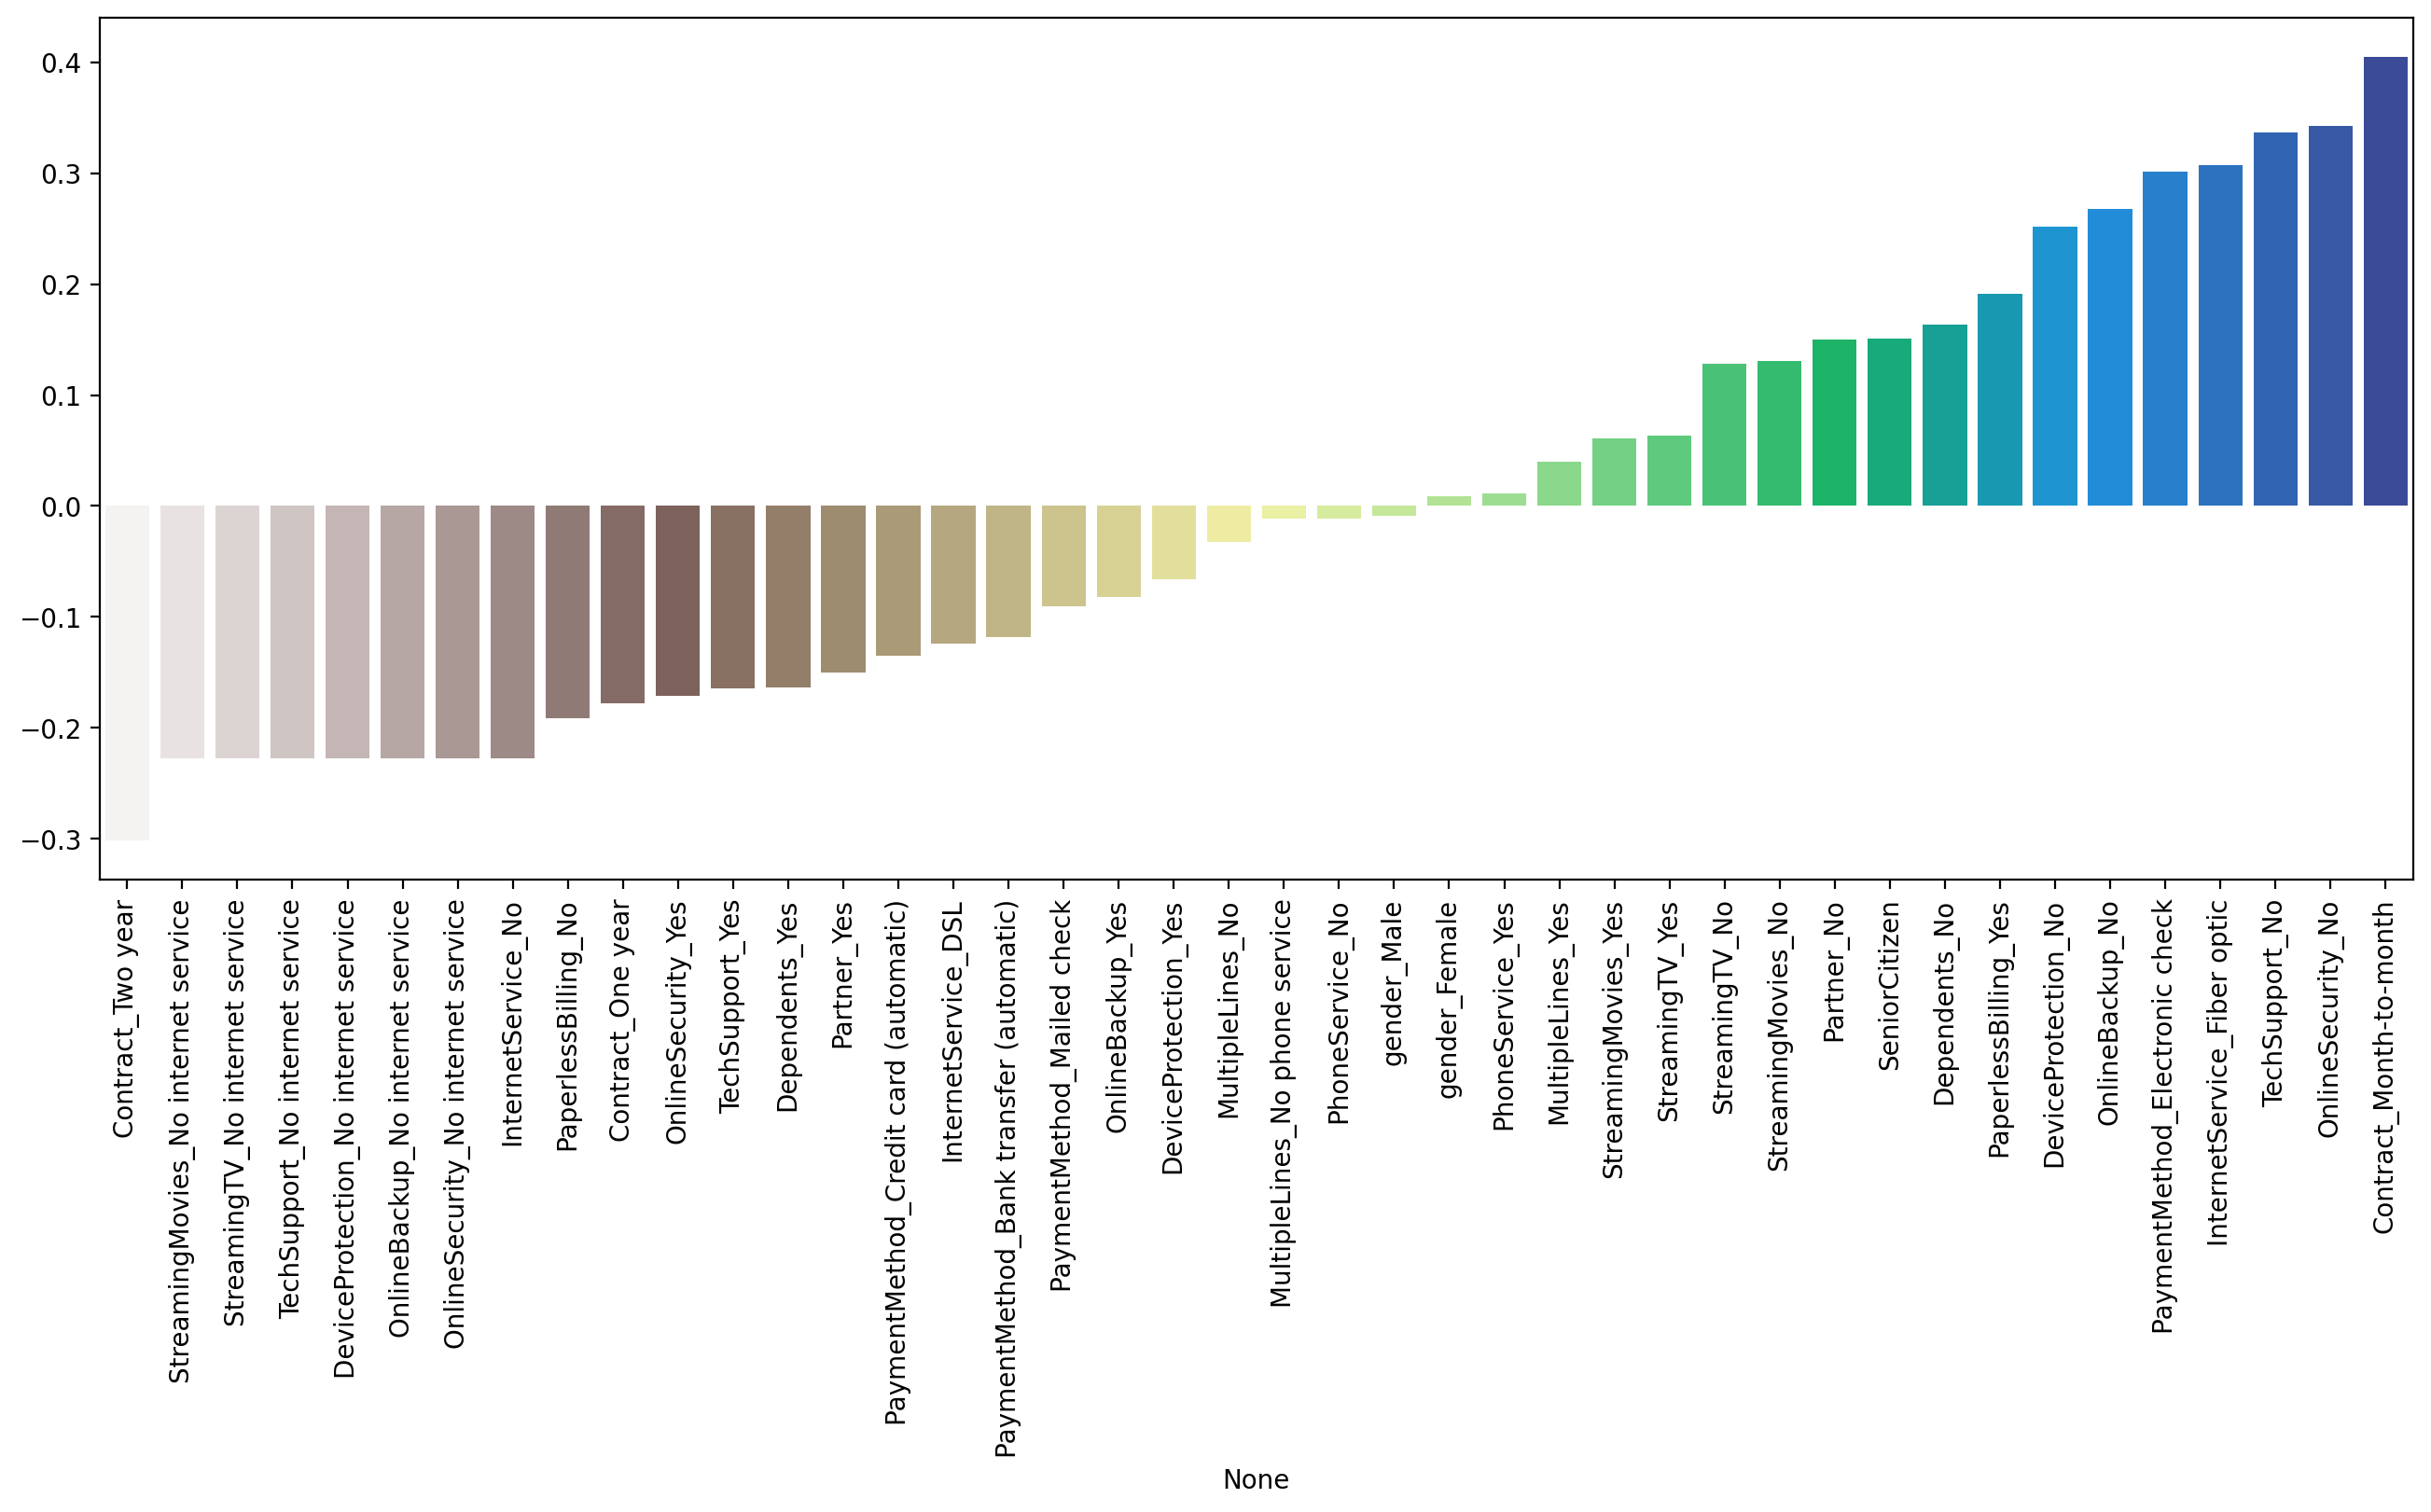

In [45]:
plt.figure(figsize=(16,6), dpi = 200)
sns.barplot(x = corr_yes_churn.index, y = corr_yes_churn.values, palette="terrain_r")
plt.xticks(rotation = 90)

In [47]:
# Contract types
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='tenure', ylabel='Count'>

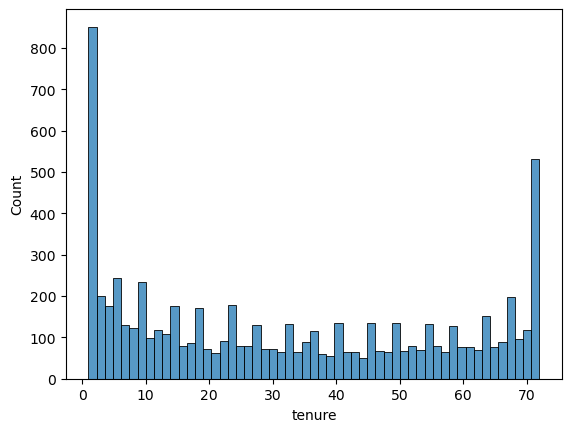

In [51]:
# Creating a histogram to display the distribution of 'tenure' column.
sns.histplot(data = df, x = 'tenure', bins = 55)

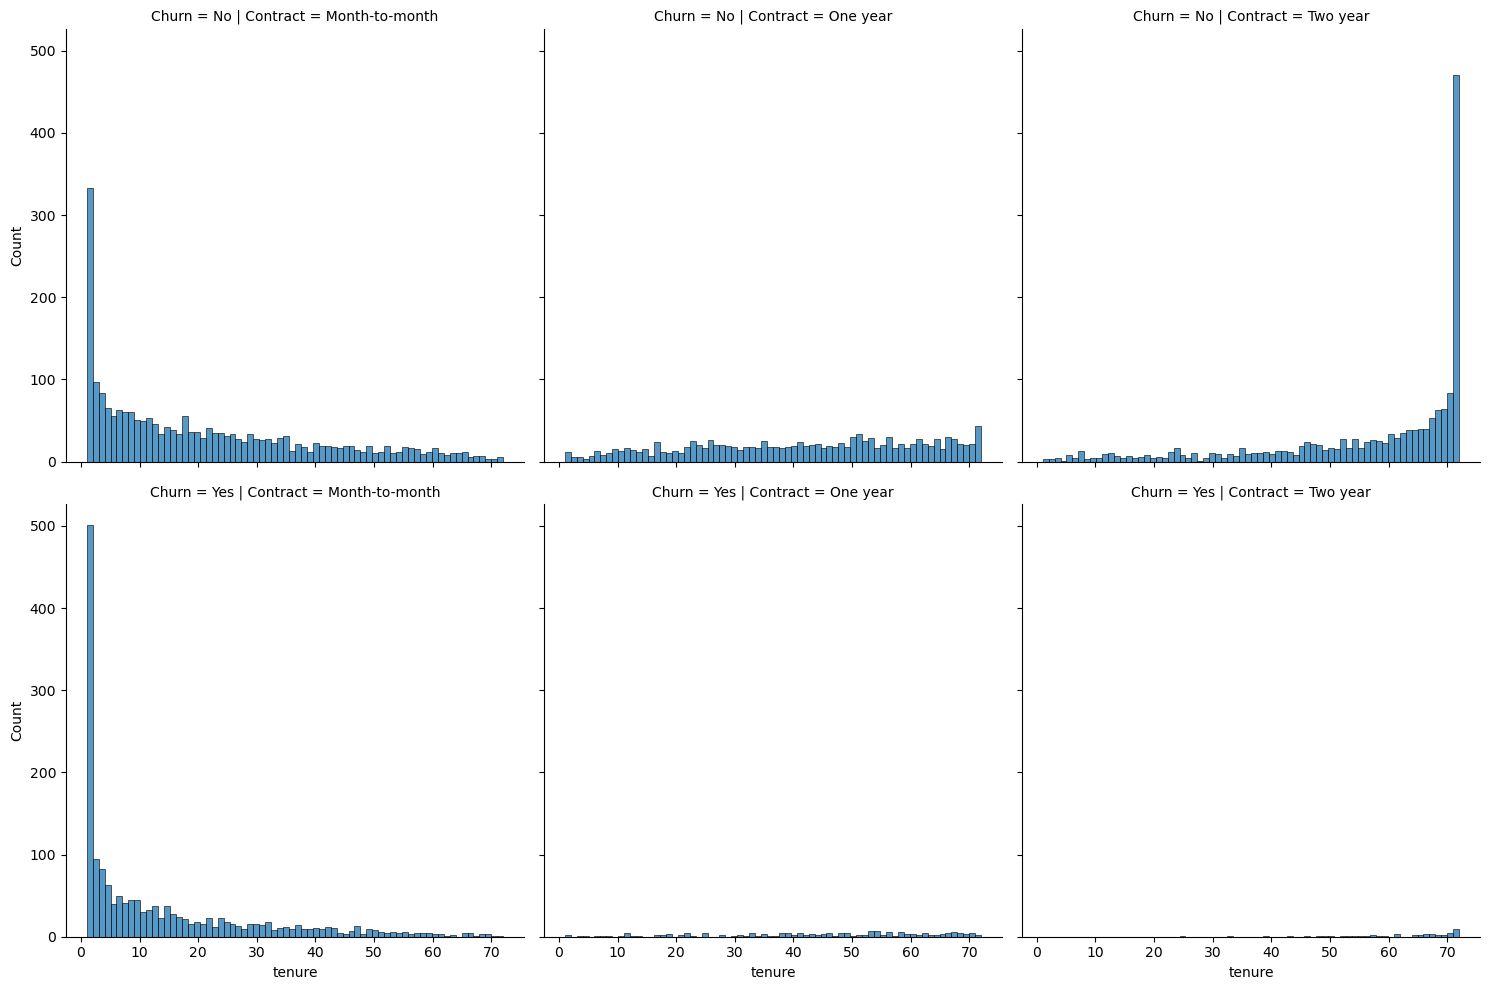

In [53]:
sns.displot(data = df, x = 'tenure', bins = 70, col = 'Contract', row = 'Churn')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

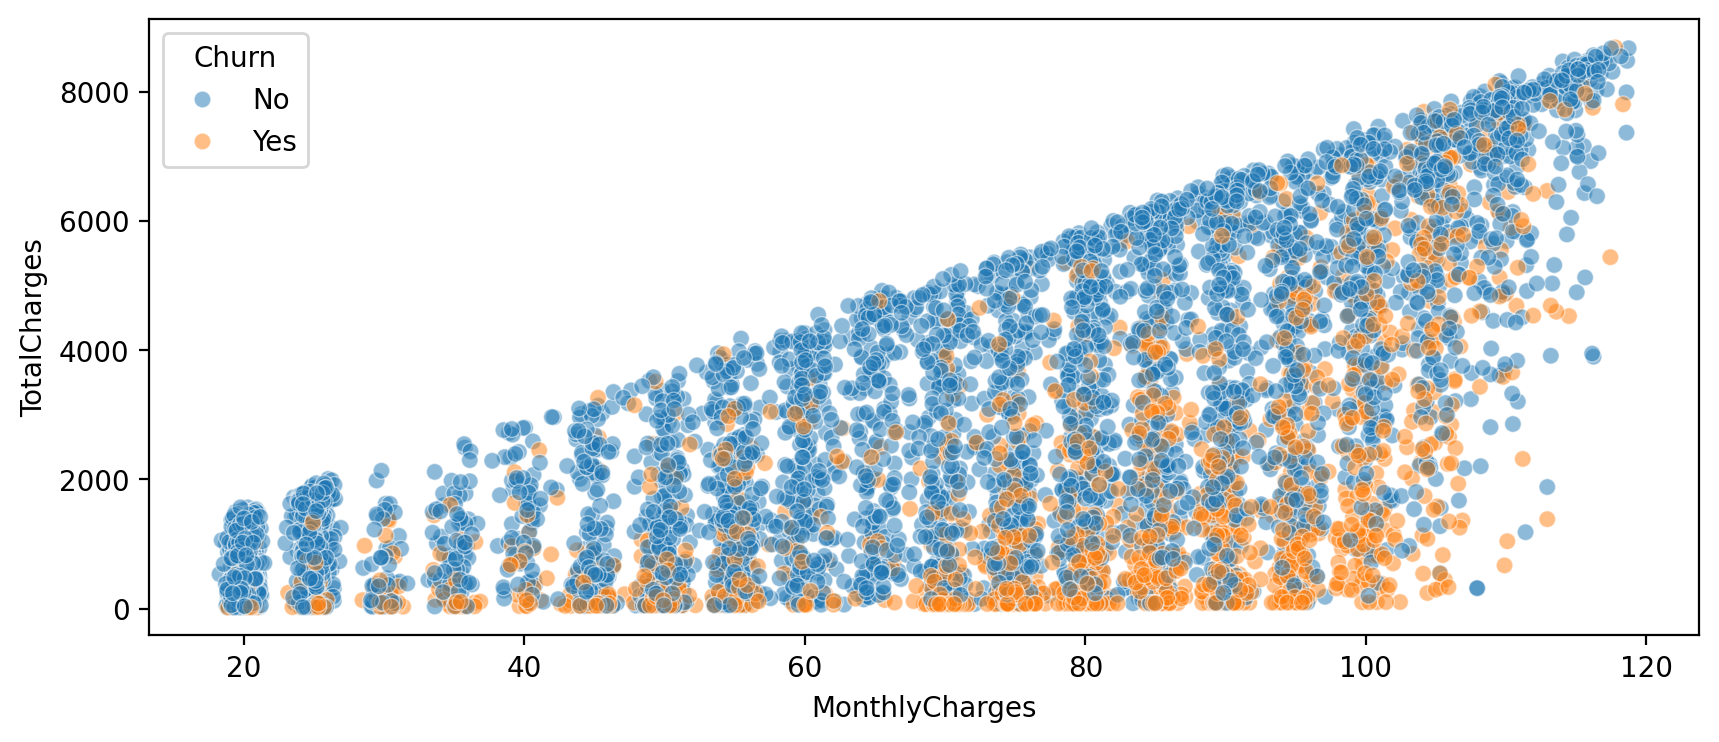

In [55]:
# Display a scatter plot of TotalCharges vs MonthlyCharges
plt.figure(figsize=(10,4), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', alpha = 0.5)

In [59]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [60]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [61]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [62]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [63]:
churn_rate = 100*yes_churn/(no_churn + yes_churn)

In [64]:
churn_rate

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [67]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

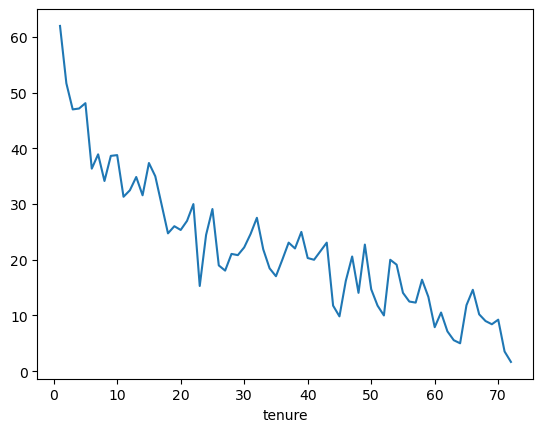

In [68]:
churn_rate.transpose()['customerID'].plot()

In [69]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [72]:
df['Tenure Cohort'] =  df['tenure'].apply(cohort)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

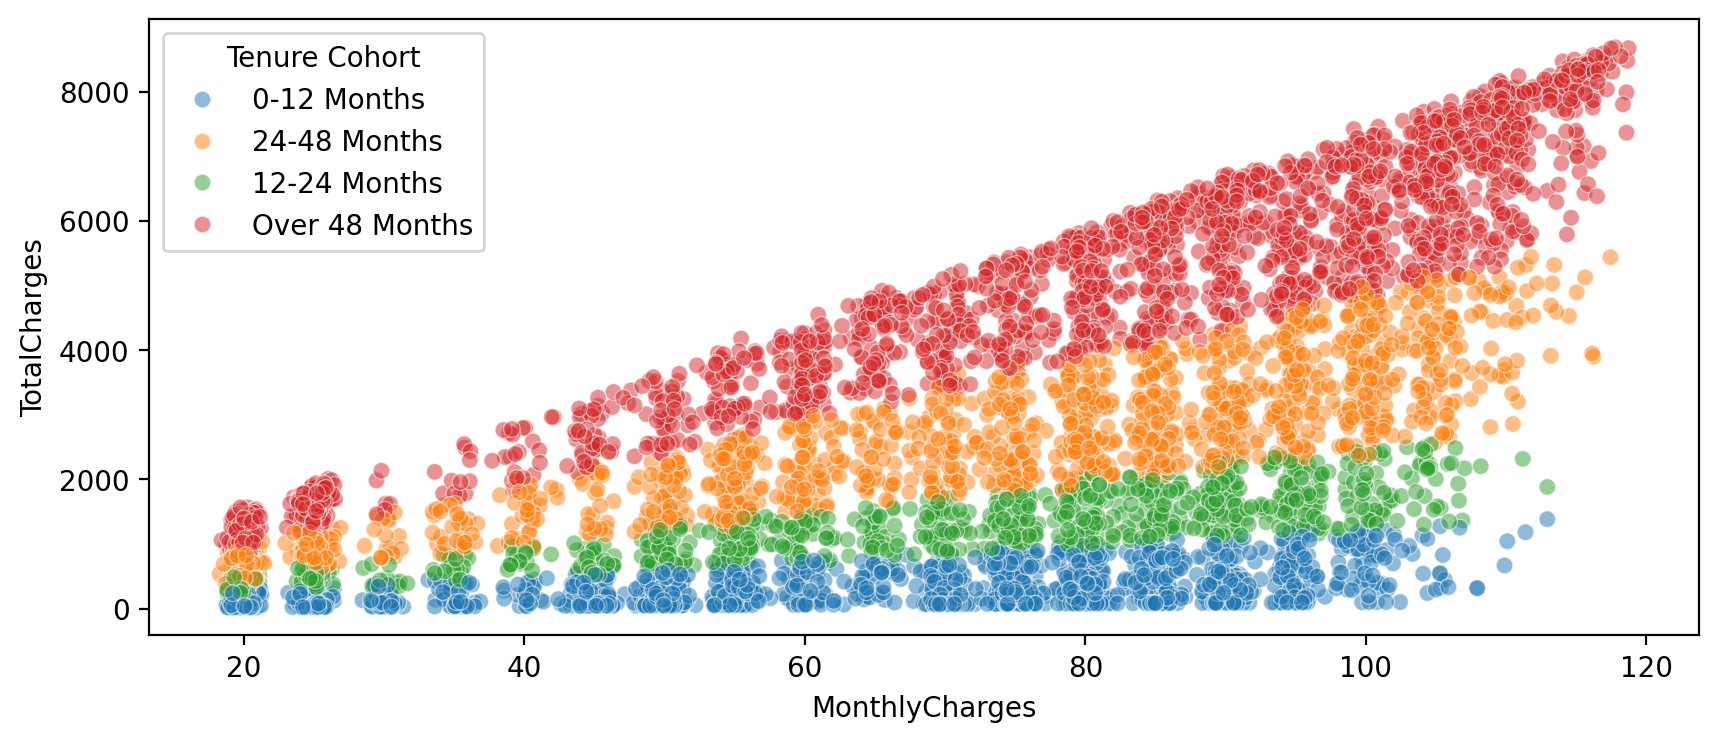

In [73]:
plt.figure(figsize=(10,4), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Tenure Cohort', alpha = 0.5)

<Axes: xlabel='Tenure Cohort', ylabel='count'>

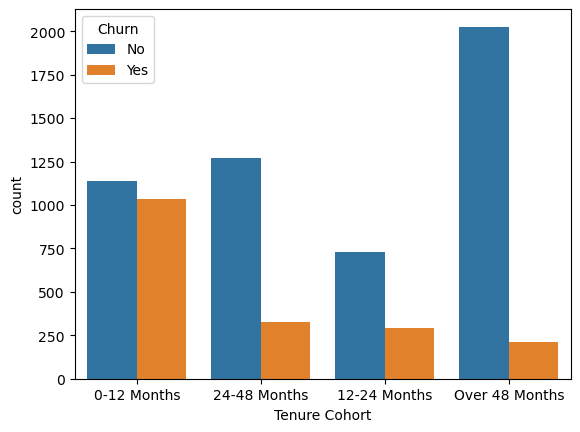

In [74]:
sns.countplot(data = df, x = 'Tenure Cohort', hue = 'Churn')

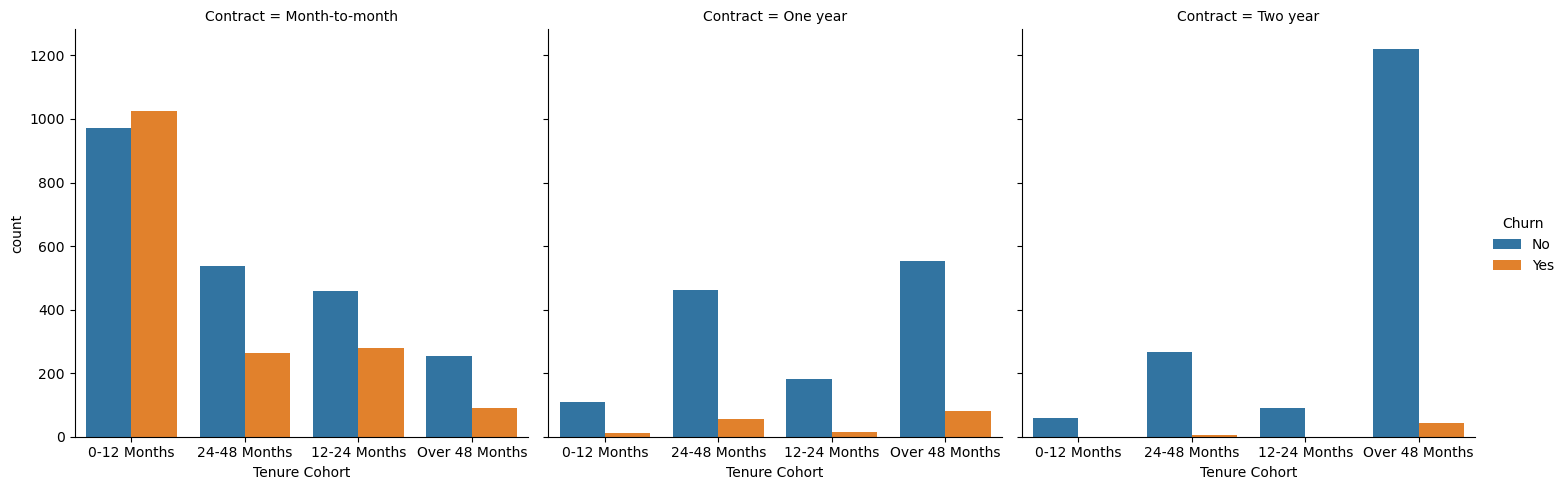

In [76]:
sns.catplot(data = df,x = 'Tenure Cohort', hue = 'Churn', kind = 'count', col = 'Contract' )

## Predictive Modeling

In [77]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']  # add other binary columns if needed
for col in binary_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert multi-category columns to dummy variables
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaymentMethod', 'Tenure Cohort'  # add other multi-category columns if needed
])

In [95]:
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']
y = LabelEncoder().fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [96]:
import xgboost as xgb

In [111]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.3, 0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Perform randomized search
xgb_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_param_grid, n_iter=10, scoring='f1', cv=5, random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

In [127]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc


In [119]:
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

In [120]:
print("\nXGBoost Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))


XGBoost Model Evaluation
Accuracy: 0.7953091684434968


In [121]:
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.5813953488372093


In [122]:
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.8364700187916406


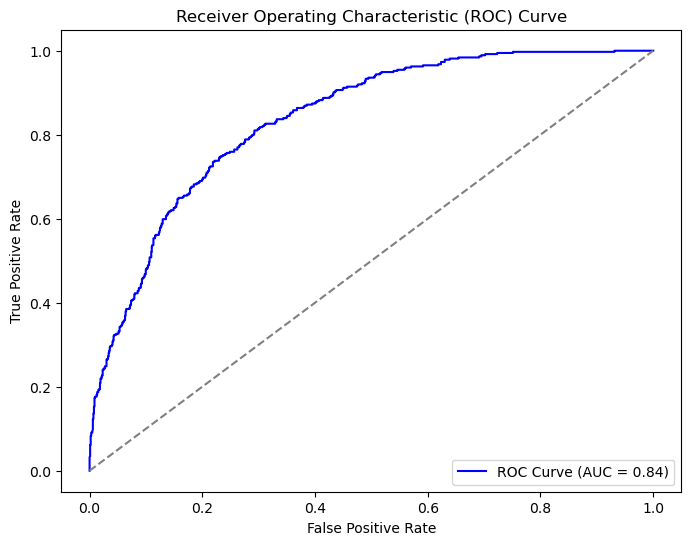

AUC Score: 0.84


In [128]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

In [123]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[919 114]
 [174 200]]


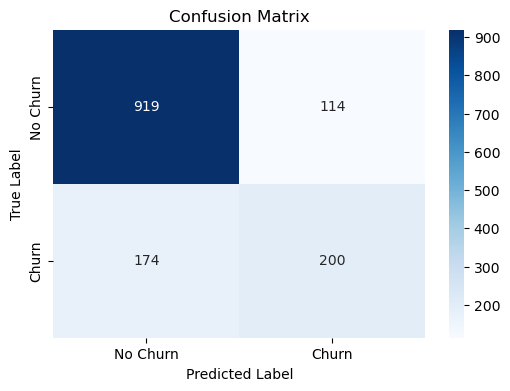

In [125]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [124]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

